In [ ]:
from matplotlib import cm # Colores
import numpy as np # Vectores
import matplotlib.pyplot as plt # Graficas

In [ ]:
# Creamos la función
def function(x,y):
    return x**4 + y**4

Text(0.5, 0.92, 'Función de coste - Gráfica 3D')

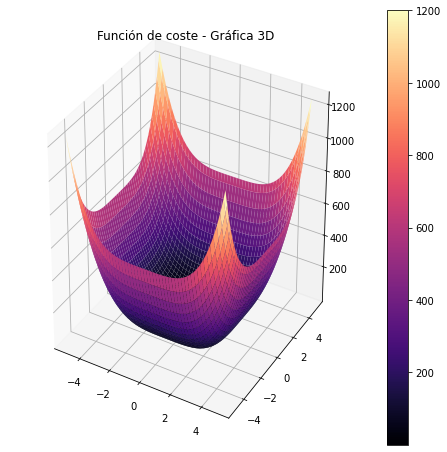

In [ ]:
# Resolución
res = 100
# Valores para evaluar x y y
x = np.linspace(-5, 5, res)
y = np.linspace(-5, 5, res)
# Creamos los vectores 
X,Y = np.meshgrid(x, y)

Z = function(X,Y)

# Para que no la dibuje en blanco
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

# Creamos la superficie
# Color: https://matplotlib.org/stable/tutorials/colors/colormaps.html
surf = ax.plot_surface(X, Y, Z, cmap=cm.magma)

# Barrita lateral
fig.colorbar(surf)

# Tamaño
fig = plt.gcf()
fig.set_size_inches(8, 8)

# Titulo
plt.title("Función de coste - Gráfica 3D")

In [ ]:
# Funcion de la derivada parcial según la definición
def derivate(cp, p):
    return ( function(cp[0], cp[1]) - function(p[0], p[1]) ) / h

In [ ]:
# Creamos el gradiente
def gradient(p):
    # Lo iniciamos como un vector de 2 dimensiones lleno de 0's, para llenarlo con 1's
    grad = np.zeros(2)
    # Obtenemos el indice y el valor de cada componente
    # para hacer la derivada parcial de cada una
    for idx, val in enumerate(p):
        # Copiamos el punto P para agregarle el incremento
        punto_incremento = np.copy(p)
        punto_incremento[idx] += h
        # Calculamos la derivada parcial
        partial_derivate = derivate(punto_incremento, p)
        # Modificamos el vector de 0's
        grad[idx] = partial_derivate
        
    return grad

[0.0299831  0.03016229]


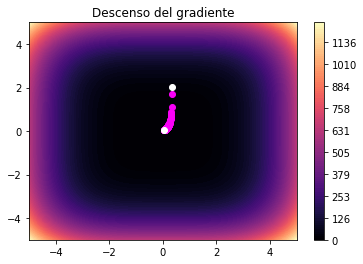

In [ ]:
p = np.random.rand(2) * 10 - 5

# Definimos el delta h y los pasos alpha
h = 0.01
alpha = 0.01

# Para que dibuje todo juntito
level_map = np.linspace(np.min(Z), np.max(Z),res) 
plt.contourf(X, Y, Z, levels=level_map,cmap=cm.magma)
plt.colorbar()
plt.title('Descenso del gradiente')

plt.plot(p[0],p[1],'o', c='#FFFFFF')


for i in range(10000):
    p = p - alpha * gradient(p)
    # Dibujamos cada 5 iteraciones para que se distinga
    if (i % 5 == 0):
        plt.plot(p[0], p[1], 'o', c='#FA00F7')
        
# Dibujamos el extremo de rojo para saber donde termina
plt.plot(p[0],p[1], 'o', c='#FFFFFF')
print(p)

---